#### Projeto de Estatística e Probabilidade Experimental
##### Pré-processamento, medidas de tendência central, dispersão e separatrizes

+ Alexander Cardoso
+ GitHub: https://github.com/AlexanderFilho/estatistica.git
+ Dataset (Cardiovascular Disease): https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

In [145]:
# Processamento
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import Normalizer

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
# Classe para facilitar abertura de arquivos em .csv
class OpenCSV:
    def __init__(self, datasetDir=None, sep=','):
        self.csv = datasetDir
        self.sep = sep
    
    def open(self):
        df = pd.read_csv(self.csv, sep=self.sep)
        return df

In [147]:
# Abertura do Dataset de Doença Cardiovascular
csvFilePath = "cardio_train.csv"

dataFrame = OpenCSV(csvFilePath, sep=';').open()
dataFrame.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


+ id - identificação do paciente - discreto

+ age - idade do paciencia em dias - discreto

+ genero - (1): homem -- (2): mulher - discreto

+ height - altura em centímetro - discreto

+ weight - peso em quilos - contínuo

+ ap_hi  - sístole (batimento cardiaco) - discreto

+ ap_lo  - diástole (relaxamento - preenchimento de sangue no coração) - discreto

+ cholesterol - colesterol (1): normal -- (2): acima do normal -- (3): alto - discreto

+ gluc - glucose (1): normal -- (2): acima do normal -- (3): alto - discreto

+ smoke - fumante (0): não -- (1): sim - discreto

+ alco - ingere bebidas alcoolicas (0): não -- (1): sim - discreto

+ active - faz atividades físicas (0): não -- (1): sim - discreto

+ cardio - possui doença cardiovascular (0): não -- (1): sim - discreto

### 01. Pré-processamento

In [148]:
# Mudança de nome das variáveis
newColumns = ["ID", "Idade", "Genero", "Altura", "Peso", "Sistole", "Diastole", "Colesterol", "Glucose", "Fuma", "Alcool", "Ativo", "Cardiaco"]
dataFrame.columns = newColumns

In [149]:
dataFrame.head()

,ID,Idade,Genero,Altura,Peso,Sistole,Diastole,Colesterol,Glucose,Fuma,Alcool,Ativo,Cardiaco
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [150]:
# Convertendo a variável Idade de dias para anos
novasIdades = dataFrame.Idade.values / 365
for i in range(len(novasIdades)):
    novasIdades[i] = math.ceil(novasIdades[i])

dataFrame.Idade = novasIdades
dataFrame.head()

,ID,Idade,Genero,Altura,Peso,Sistole,Diastole,Colesterol,Glucose,Fuma,Alcool,Ativo,Cardiaco
0,0,51.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,56.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,49.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


In [151]:
# Mostrar quantidade de características e de variáveis
print(f"\n[*] Características: {dataFrame.shape[0]} | Variáveis: {dataFrame.shape[1]}")


[*] Características: 70000 | Variáveis: 13


In [152]:
# Porcentagem de Doença Cardiovascular entre homens e mulheres
hmDataframe = dataFrame.iloc[:, [2, -1]]

In [153]:
#  1 e 1 --> homens cardíacos
#  2 e 1 --> mulheres cardíacas
hmDataframe.value_counts()

Genero  Cardiaco
1       0           22914
        1           22616
2       1           12363
        0           12107
dtype: int64

In [154]:
hmDataframe = hmDataframe.groupby(hmDataframe.Genero).sum()  # soma somente os valores 1
hmDataframe

,Cardiaco
Genero,
1,22616
2,12363


In [155]:
# dcv --> Doença Cardiovascular
dcvHomens = hmDataframe.iloc[0]
dcvMulheres = hmDataframe.iloc[1]

totalDCV = dcvHomens + dcvMulheres

perDCVHomens = dcvHomens / totalDCV
perDCVMulheres = dcvMulheres / totalDCV

In [156]:
# Total de homens e mulheres com doença cardiovascular
totalDCV = dcvHomens + dcvMulheres

In [157]:
# Porcentagem
perDCVHomens = dcvHomens / totalDCV
perDCVMulheres = dcvMulheres / totalDCV

In [158]:
print()
print("+--- Cardíacos ---+")
print("| Homens: %.2f%%   |" % (perDCVHomens))
print("| Mulheres: %.2f%% |" % (perDCVMulheres))
print("+-----------------+")


+--- Cardíacos ---+
| Homens: 0.65%   |
| Mulheres: 0.35% |
+-----------------+


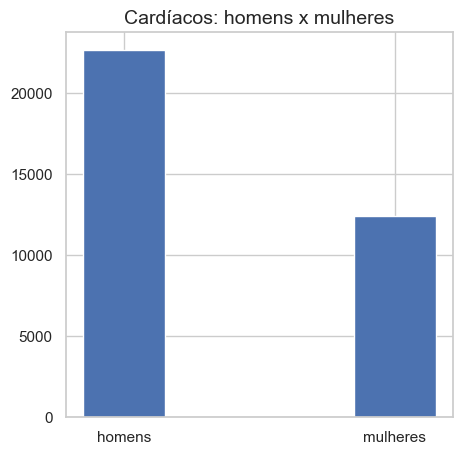

In [159]:
plt.figure(1, figsize=(5, 5))
plt.bar(x=["homens", "mulheres"], height=[dcvHomens[0], dcvMulheres[0]], width=0.3)
plt.title("Cardíacos: homens x mulheres", fontsize=14)
plt.show()

### 02. Medidas de tendências centrais, dipersão e separatrízes

In [160]:
# Incluindo faixa de valores para os pesos
newDataframe = dataFrame.query("Peso >= 50 and Peso <= 120 ")
pesos = newDataframe.Peso  # formato series do pandas
pesos.head()

0    62.0
1    85.0
2    64.0
3    82.0
4    56.0
Name: Peso, dtype: float64

In [161]:
# Media dos pesos
meanWeights = pesos.mean()

# Mediana dos pesos
medianWeights = pesos.median()

# Variância
varWeights = pesos.var()

# Desvio-padrão
stdWeights = pesos.std()

In [162]:
print()
print(f"[*] Média dos Pesos: {meanWeights:.2f}")
print(f"[*] Mediana dos Pesos: {medianWeights:.2f}")
print('*' * 30)
print(f"[*] Máximo: {pesos.max()}")
print(f"[*] Mínimo: {pesos.min()}")
print('*' * 30)
print(f"[*] Variância: {varWeights:.4f}")
print(f"[*] Desvio-padrão: {stdWeights:.4f}")


[*] Média dos Pesos: 74.19
[*] Mediana dos Pesos: 72.00
******************************
[*] Máximo: 120.0
[*] Mínimo: 50.0
******************************
[*] Variância: 172.1672
[*] Desvio-padrão: 13.1212


A variância e o desvio-padrão estão altos devido a distância entre o valor mínimo e o valor máximo da variável "Peso"

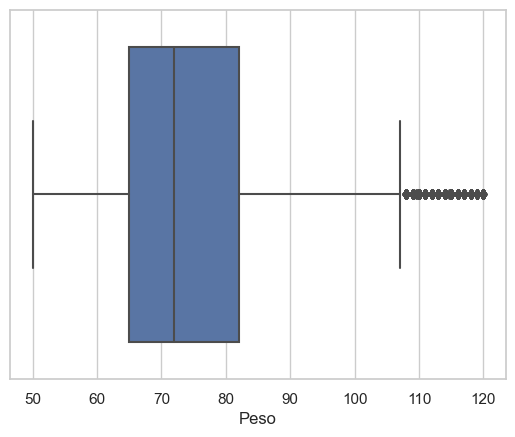

In [163]:
"""
    Boxplot é responsável por mostrar os principais fatores e medidas
    para a visualização dos dados,  sendo mostrado então até  valores
    incosistentes, também chamados de outliers.
"""
sns.set_theme(style="whitegrid")
sns.boxplot(x=pesos);

In [164]:
# Incluindo faixa de valores para as alturas
newDataframe = newDataframe.query("Altura > 150 and Altura < 180")

In [165]:
newDataframe.head()

,ID,Idade,Genero,Altura,Peso,Sistole,Diastole,Colesterol,Glucose,Fuma,Alcool,Ativo,Cardiaco
0,0,51.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,56.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,49.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


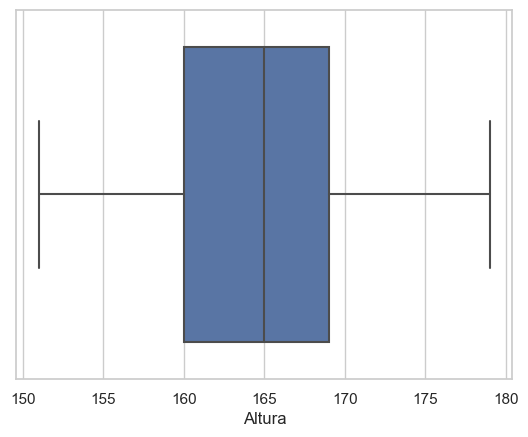

In [166]:
sns.boxplot(x=newDataframe.Altura);

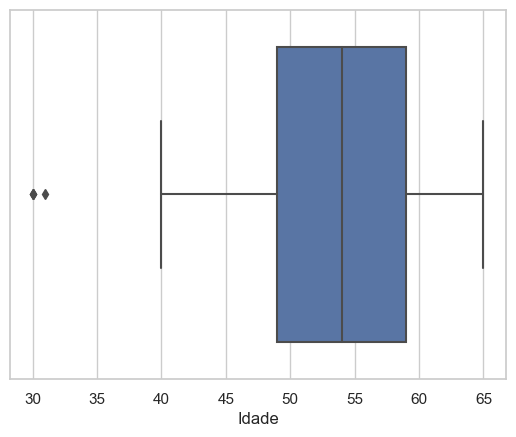

In [189]:
sns.boxplot(x=newDataframe.Idade);

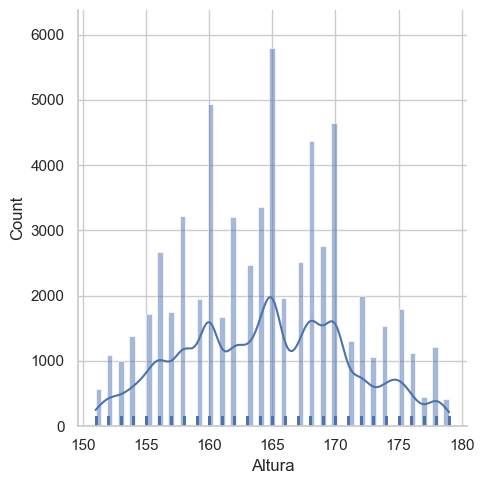

In [167]:
sns.displot(x=newDataframe.Altura, kde=True, rug=True);

### 03. Normalização

In [168]:
# Variáveis que serão normalizadas
arrayToNorm = dataFrame[["Idade", "Altura", "Peso"]].values

In [169]:
# Normalização dos Dados
norm = Normalizer().fit(arrayToNorm)
normalizedArray = norm.transform(arrayToNorm)

In [170]:
"""
    Os dados  são  normalizados  para  que  eles estejam  dentro de  uma  escala
    comum sem alterar o seu real valor. Com isso, os dados não terão  relevância
    entre si e/ou muito dispersos por estarem na mesma escala, normalmente entre
    0 e 1.
"""
normalizedArray

array([[0.27390472, 0.90227438, 0.33298221],
       [0.30063675, 0.83748808, 0.45632363],
       [0.28190597, 0.89450934, 0.3469612 ],
       ...,
       [0.24363503, 0.84123039, 0.48267318],
       [0.32861319, 0.86393467, 0.38161532],
       [0.29500434, 0.87983752, 0.37263707]])

In [171]:
# Transposição 
normalizedArray = normalizedArray.T

In [172]:
idadeNormalizada  = normalizedArray[0]
alturaNormalizada = normalizedArray[1]
pesosNormalizados = normalizedArray[2]

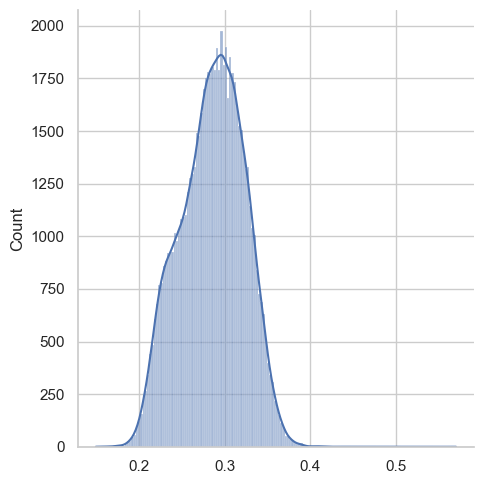

In [173]:
# Distribuição normalizada das idades
sns.displot(x=idadeNormalizada, kde=True);

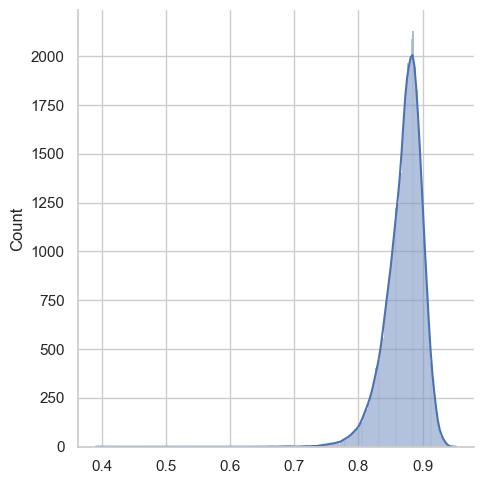

In [174]:
# Distribuição normalizada das alturas
sns.displot(x=alturaNormalizada, kde=True);

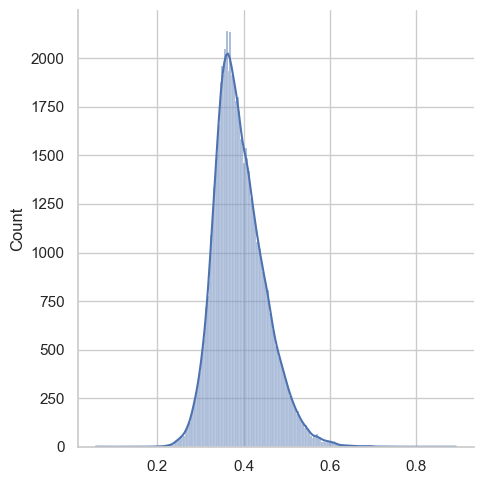

In [175]:
# Distribuição normalizada dos pesos
sns.displot(x=pesosNormalizados, kde=True);

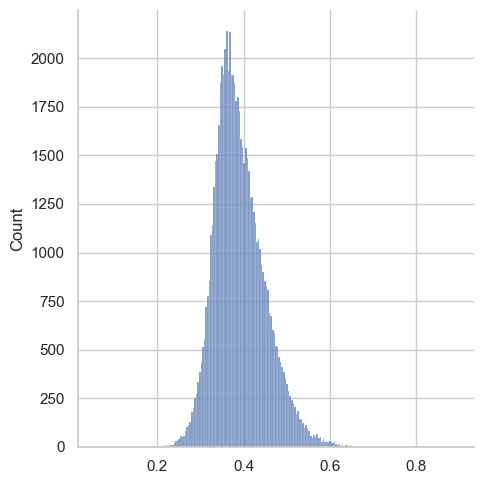

In [176]:
# Distribuição normalizada dos pesos sem a curva normal
sns.displot(x=pesosNormalizados);